In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


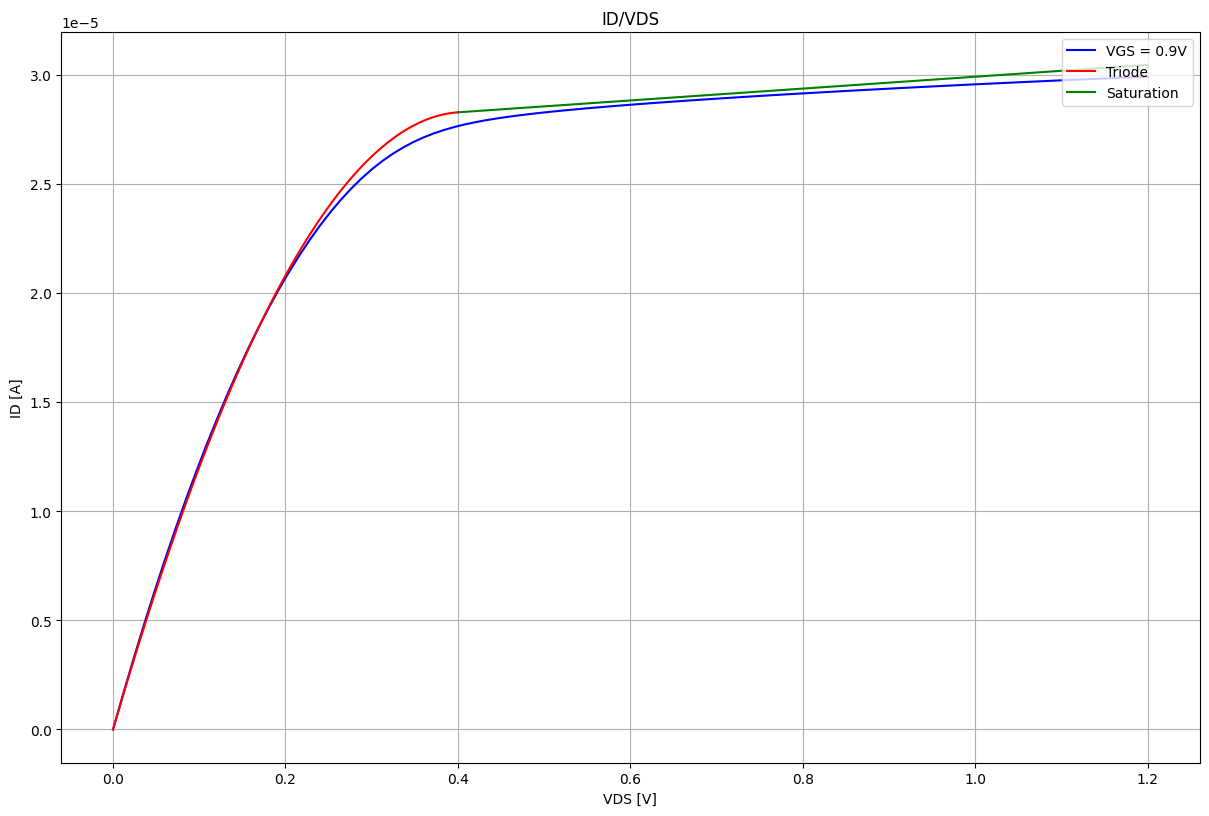

In [43]:
dir = "data"
filename = "nch_iv.csv"
data = pd.read_csv(os.path.join(dir, filename))

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

vgs = data["/M0/D (vgs=0.9) X"]
gm  = data["/M0/D (vgs=0.9) Y"]

def gm_sat(vds):
    Kp = 0.00034
    Vth = 0.5
    lam = 0.1
    vgs = 0.9
    id = (1/2) * Kp * (2 * (vgs - Vth) * vds - vds**2) * (1 + lam * vds)
    return id

def saturation(vds):
    Kp = 0.00034
    Vth = 0.5
    lam = 0.1
    vgs = 0.9
    id = (1/2) * Kp * (vgs - Vth)**2 * (1 + lam * vds)
    return id

ax.plot(vgs, gm, label="VGS = 0.9V", color="blue")

x = np.linspace(0, 0.4, 100)
ax.plot(x, gm_sat(x), label="Triode", color="red")
x2 = np.linspace(0.4, 1.2, 100)
ax.plot(x2, saturation(x2), label="Saturation", color="green")

fig.tight_layout()

ax.grid(True)
ax.legend(loc="upper right")
plt.title('ID/VDS')
plt.xlabel('VDS [V]')
plt.ylabel('ID [A]')
plt.show()

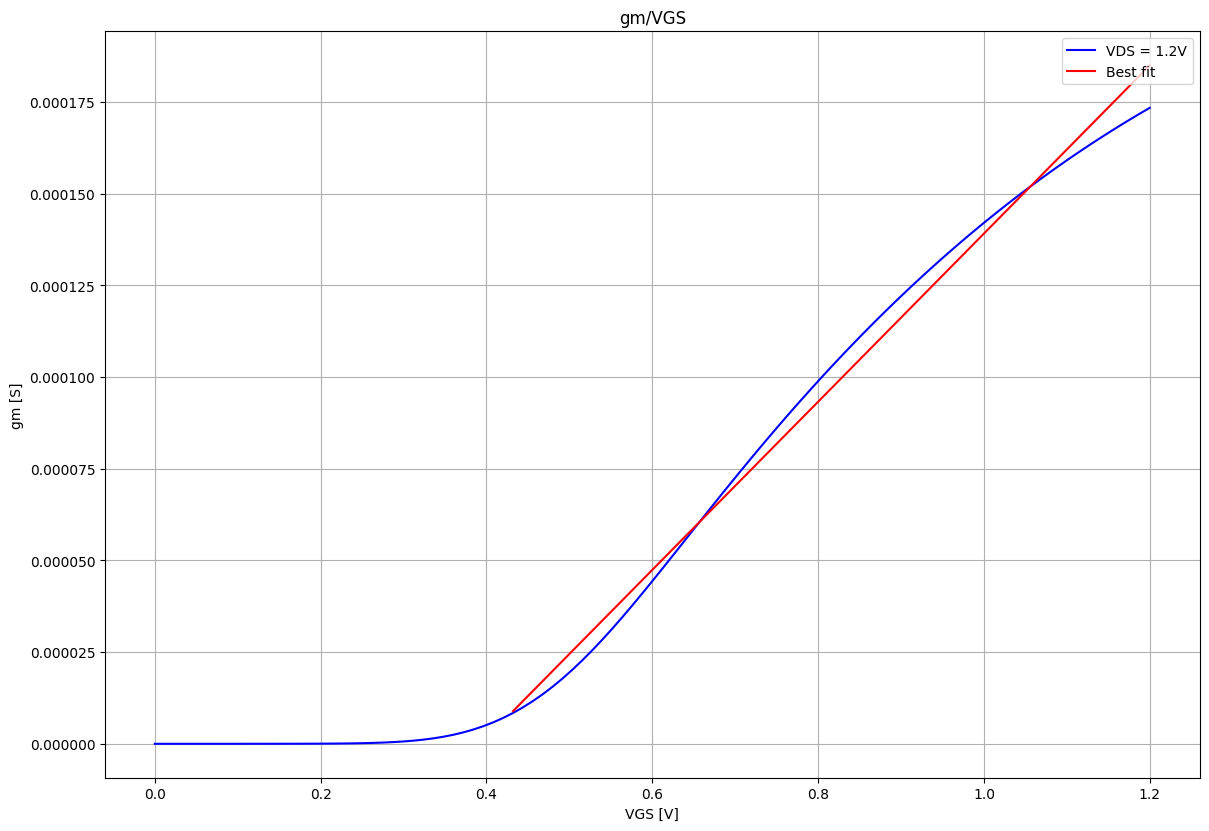

In [122]:
dir = "data"
filename = "nch_w1_l1_gm_vgs.csv"
data = pd.read_csv(os.path.join(dir, filename))

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

vgs = data["OS(\"/M0\" \"gm\") X"].to_numpy()
gm  = data["OS(\"/M0\" \"gm\") Y"].to_numpy()

def gm_sat(vgs):
    Kp = 0.0003
    WL = 1
    Vth = 0.5
    gm = Kp * WL * (vgs - Vth)
    return gm

ax.plot(vgs, gm, label="VDS = 1.2V", color="blue")

x = np.linspace(0.4, 1.2, 100)
# ax.plot(x, gm_sat(x), label="Square law - Sat", color="green")

slice_index = 36
vgs_sliced = vgs[slice_index:]
gm_sliced = gm[slice_index:]
gm_fit = np.polyfit(vgs_sliced, gm_sliced, deg=1)
ax.plot(vgs_sliced, np.polyval(gm_fit, vgs_sliced), label="Best fit", color="red")

fig.tight_layout()

ax.grid(True)
ax.legend(loc="upper right")
plt.title('gm/VGS')
plt.xlabel('VGS [V]')
plt.ylabel('gm [S]')
plt.show()

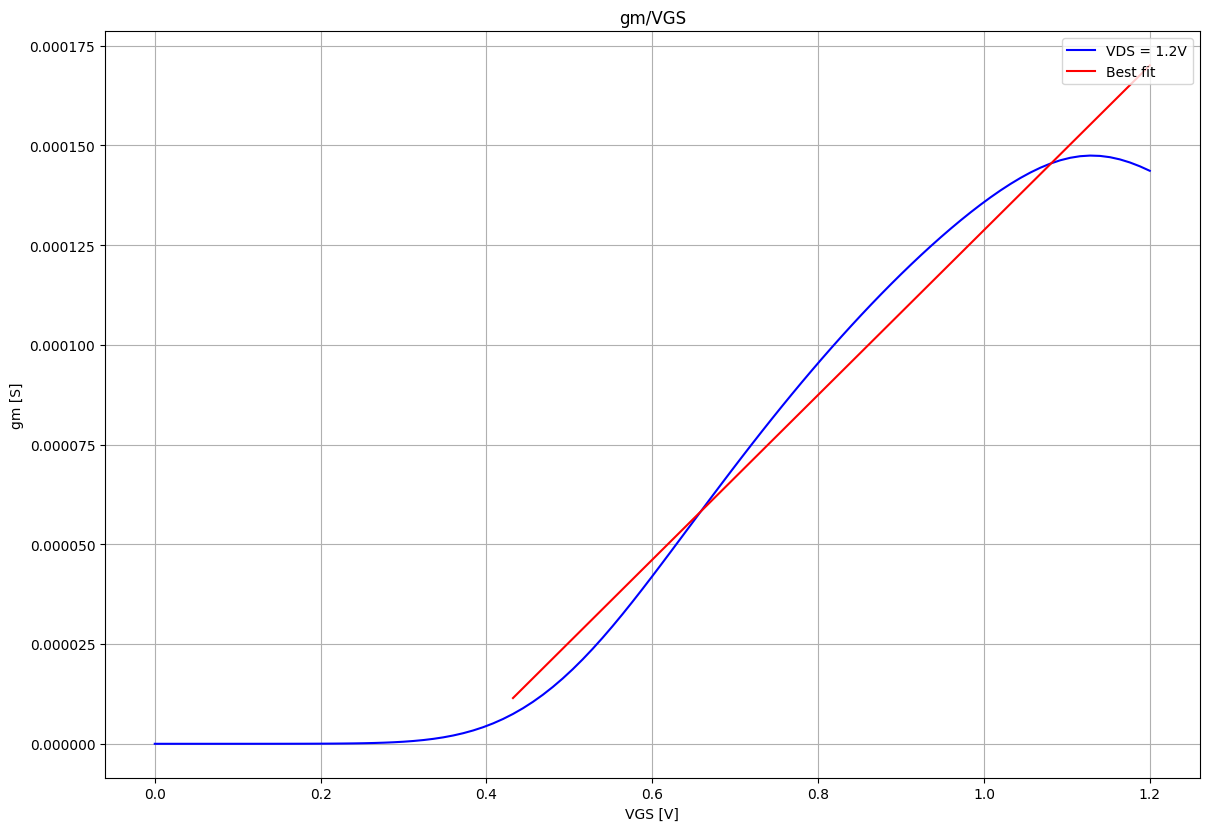

In [124]:
dir = "data"
filename = "nch_1w_1l_gm_vgs_vds0.6.csv"
data = pd.read_csv(os.path.join(dir, filename))

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

vgs = data["OS(\"/M0\" \"gm\") X"].to_numpy()
gm  = data["OS(\"/M0\" \"gm\") Y"].to_numpy()

def gm_sat(vgs):
    Kp = 0.0003
    WL = 1
    Vth = 0.5
    gm = Kp * WL * (vgs - Vth)
    return gm

ax.plot(vgs, gm, label="VDS = 1.2V", color="blue")

x = np.linspace(0.4, 1.2, 100)
# ax.plot(x, gm_sat(x), label="Square law - Sat", color="green")

slice_index = 36
vgs_sliced = vgs[slice_index:]
gm_sliced = gm[slice_index:]
gm_fit = np.polyfit(vgs_sliced, gm_sliced, deg=1)
ax.plot(vgs_sliced, np.polyval(gm_fit, vgs_sliced), label="Best fit", color="red")

fig.tight_layout()

ax.grid(True)
ax.legend(loc="upper right")
plt.title('gm/VGS')
plt.xlabel('VGS [V]')
plt.ylabel('gm [S]')
plt.show()

C:\Users\techu\AppData\Local\Temp\ipykernel_8992\4125201451.py:13: RuntimeWarning: divide by zero encountered in divide
  return 2 / (vgs - Vth)


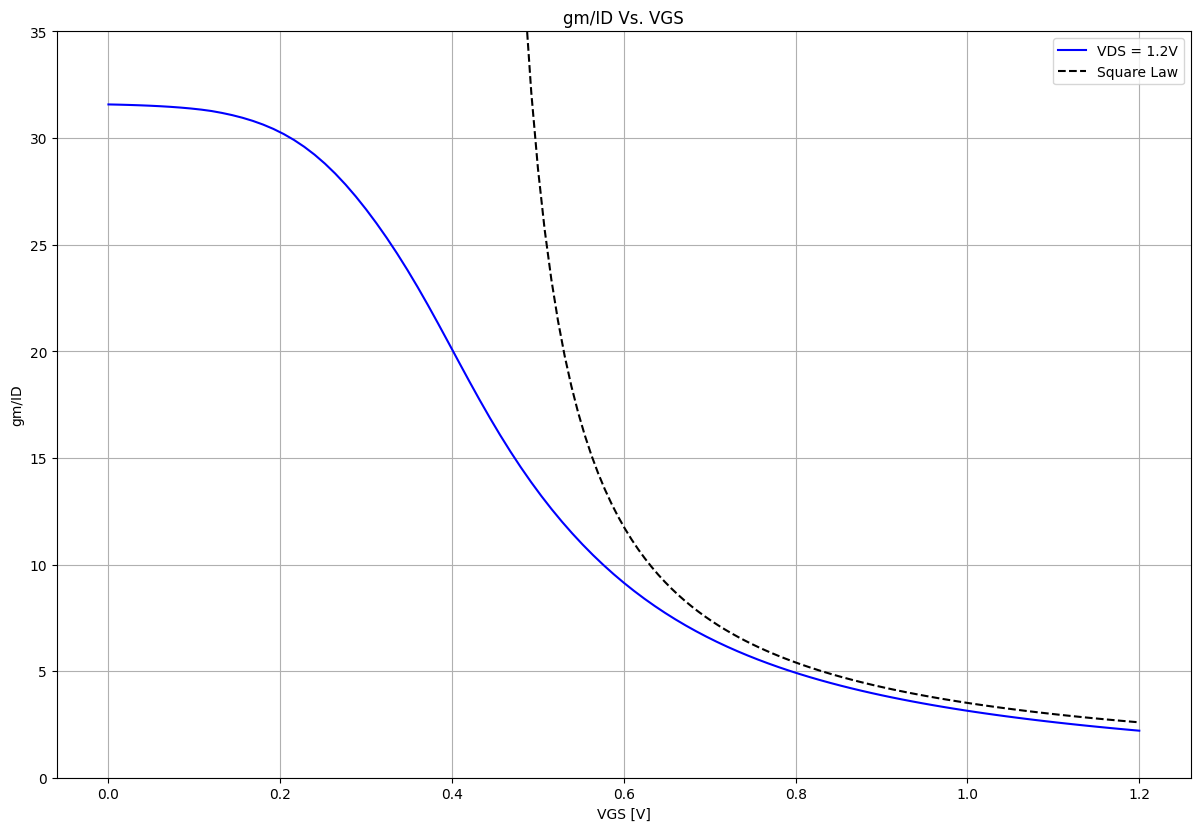

In [147]:
dir = "data"
filename = "nch_w10_l1_gmoverid_vgs.csv"
data = pd.read_csv(os.path.join(dir, filename))

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

vgs = data["OS(\"/M0\" \"gmoverid\") X"].to_numpy()
gm  = data["OS(\"/M0\" \"gmoverid\") Y"].to_numpy()

Vth = 0.43
def gmoverid(vgs):
    return 2 / (vgs - Vth)

ax.plot(vgs, gm, label="VDS = 1.2V", color="blue")

x = np.linspace(Vth, 1.2, 100)
ax.plot(x, gmoverid(x), label="Square Law", color="black", linestyle="--")

slice_index = 40
vgs_sliced = vgs[slice_index:]
gm_sliced = gm[slice_index:]
gm_fit = np.polyfit(vgs_sliced, gm_sliced, deg=2)
# ax.plot(vgs_sliced, np.polyval(gm_fit, vgs_sliced), label="Best fit", color="red")

fig.tight_layout()

ax.grid(True)
ax.legend(loc="upper right")
plt.title('gm/ID Vs. VGS')
plt.xlabel('VGS [V]')
plt.ylabel('gm/ID')
plt.ylim(0, 35)
plt.show()